## Supply Chain Data Preprocessing

1. Data Loading and Initial Inspection
2. Data Cleaning and Type Conversion
3. Missing Value Analysis
4. Feature Engineering
5. Outlier Detection and Handling
6. Data Validation

In [18]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
file_path = "dynamic_supply_chain_logistics_dataset.csv"
df = pd.read_csv(file_path)

# Basic view
print("Shape:", df.shape)
df.head()

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
df.info()

Shape: (32065, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12 

### Initial Data Loading Results
- Dataset loaded successfully
- Shape: (32065, 26) - 32,065 records with 26 features
- Column names standardized (lowercase, underscores)
- No immediate data quality issues detected

In [19]:
# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Read the dataset
df = pd.read_csv('dynamic_supply_chain_logistics_dataset.csv')

# Display basic information about the dataset
print('\
Dataset Overview:')
print('Number of records:', len(df))
print('Number of features:', len(df.columns))
print('--------------------------------------------------------------------------')
print('\
Columns in the dataset:')
print(df.columns.tolist())
print('--------------------------------------------------------------------------')

# Display first few rows and basic statistics
print('\
First few rows of the dataset:')
print(df.head())
print('--------------------------------------------------------------------------')

# Check data types and missing values
print('\
Data Types and Missing Values:')
print(df.info())
print('--------------------------------------------------------------------------')


Dataset Overview:
Number of records: 32065
Number of features: 26
--------------------------------------------------------------------------
Columns in the dataset:
['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 'delay_probability', 'risk_classification', 'delivery_time_deviation']
--------------------------------------------------------------------------
First few rows of the dataset:
             timestamp  vehicle_gps_latitude  vehicle_gps_longitude  \
0  2021-01-01

### Data Overview Analysis
- Full view of all columns enabled
- Dataset contains expected number of records and features
- Initial data types look appropriate
- No missing values detected in the initial inspection

In [20]:
# Convert timestamp to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Check missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

print('Missing Values Analysis:')
for col, missing in missing_percentages.items():
    if missing > 0:
        print(f'{col}: {missing:.2f}%')

# Check for duplicates
duplicates = df.duplicated().sum()
print(f'\
Number of duplicate rows: {duplicates}')

# Basic statistics for numerical columns
print('\
Numerical Columns Statistics:')
print(df.describe())

Missing Values Analysis:
Number of duplicate rows: 0
Numerical Columns Statistics:
                           timestamp  vehicle_gps_latitude  \
count                          32065             32065.000   
mean   2022-10-31 00:00:00.000000256                38.024   
min              2021-01-01 00:00:00                30.000   
25%              2021-12-01 00:00:00                31.281   
50%              2022-10-31 00:00:00                36.414   
75%              2023-09-30 00:00:00                44.454   
max              2024-08-29 00:00:00                50.000   
std                              NaN                 6.918   

       vehicle_gps_longitude  fuel_consumption_rate  eta_variation_hours  \
count              32065.000              32065.000            32065.000   
mean                 -90.117                  8.012                2.893   
min                 -120.000                  5.000               -2.000   
25%                 -106.254                  5.020   

### Missing Values and Statistics Analysis
- Timestamp conversion successful
- No missing values found in any columns
- No duplicate rows detected
- Basic statistics show reasonable value ranges for numerical columns

In [21]:
# Create derived features
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month

# Calculate total risk score (combining multiple risk factors)
df['total_risk_score'] = (df['disruption_likelihood_score'] + 
                        df['route_risk_level'] + 
                        df['delay_probability']) / 3

# Calculate delivery efficiency score
df['delivery_efficiency'] = 100 - (abs(df['delivery_time_deviation']) * 10 + 
                                 abs(df['eta_variation_hours']) * 5)

# Categorize delays
df['delay_category'] = pd.cut(df['delivery_time_deviation'],
                            bins=[-float('inf'), -2, -0.5, 0.5, 2, float('inf')],
                            labels=['Very Early', 'Early', 'On Time', 'Late', 'Very Late'])

# Clean and normalize scores to 0-100 scale where needed
cols_to_normalize = ['driver_behavior_score', 'fatigue_monitoring_score', 
                    'supplier_reliability_score']

for col in cols_to_normalize:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min()) * 100

# Calculate distance between consecutive points
df['distance'] = np.sqrt(
    (df['vehicle_gps_latitude'].diff())**2 + 
    (df['vehicle_gps_longitude'].diff())**2
)

print("Data preprocessing completed. New features created:")
print("\
Shape of dataset:", df.shape)
print("\
New columns added:", 
      [col for col in df.columns if col not in ['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude', 
       'fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 
       'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level',
       'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand',
       'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score',
       'delay_probability', 'risk_classification', 'delivery_time_deviation']])

Data preprocessing completed. New features created:
Shape of dataset: (32065, 34)
New columns added: ['date', 'hour', 'day_of_week', 'month', 'total_risk_score', 'delivery_efficiency', 'delay_category', 'distance']


### Feature Engineering Results
- Created temporal features: date, hour, day_of_week, month
- Added composite metrics: total_risk_score, delivery_efficiency
- Created delay categories for better analysis
- Normalized relevant scores to 0-100 scale
- Added distance calculations between consecutive points

In [22]:
# Additional data quality checks
print("\nUnique values in categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Unique values in categorical columns:

risk_classification:
risk_classification
High Risk        23944
Moderate Risk     5011
Low Risk          3110
Name: count, dtype: int64

date:
date
2024-08-28    24
2021-01-01    24
2021-01-02    24
2021-01-03    24
2021-01-04    24
              ..
2021-01-12    24
2021-01-11    24
2021-01-10    24
2021-01-09    24
2024-08-29     1
Name: count, Length: 1337, dtype: int64

day_of_week:
day_of_week
Friday       4584
Saturday     4584
Sunday       4584
Monday       4584
Tuesday      4584
Wednesday    4584
Thursday     4561
Name: count, dtype: int64


### Data Quality Check Results
- Analyzed categorical columns for unexpected values
- Risk classification categories validated
- Day of week distribution looks normal
- Date values are within expected range

In [23]:
# Check for infinite values
inf_check = np.isinf(df.select_dtypes(include=np.number)).sum()
print('\nColumns with infinite values:')
print(inf_check[inf_check > 0])

# Check value ranges
numeric_cols = df.select_dtypes(include=np.number).columns
print('\nValue ranges for numeric columns:')
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"Min: {df[col].min():.2f}, Max: {df[col].max():.2f}")


Columns with infinite values:
Series([], dtype: int64)



Value ranges for numeric columns:

vehicle_gps_latitude:
Min: 30.00, Max: 50.00

vehicle_gps_longitude:
Min: -120.00, Max: -70.00

fuel_consumption_rate:
Min: 5.00, Max: 20.00

eta_variation_hours:
Min: -2.00, Max: 5.00

traffic_congestion_level:
Min: 0.00, Max: 10.00

warehouse_inventory_level:
Min: 0.00, Max: 1000.00

loading_unloading_time:
Min: 0.50, Max: 5.00

handling_equipment_availability:
Min: 0.00, Max: 1.00

order_fulfillment_status:
Min: 0.00, Max: 1.00

weather_condition_severity:
Min: 0.00, Max: 1.00

port_congestion_level:
Min: 0.00, Max: 10.00

shipping_costs:
Min: 100.00, Max: 1000.00

supplier_reliability_score:
Min: 0.00, Max: 100.00

lead_time_days:
Min: 1.00, Max: 15.00

historical_demand:
Min: 100.00, Max: 10000.00

iot_temperature:
Min: -10.00, Max: 40.00

cargo_condition_status:
Min: 0.00, Max: 1.00

route_risk_level:
Min: 0.00, Max: 10.00

customs_clearance_time:
Min: 0.50, Max: 5.00

driver_behavior_score:
Min: 0.00, Max: 100.00

fatigue_monitoring_score:
Min

### Value Range Analysis
- No infinite values found in any columns
- All numeric columns have reasonable min/max ranges
- GPS coordinates are within valid ranges
- Temperature values are within expected limits

In [24]:
# Handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    handle_outliers(df, col)

### Outlier Handling Results
- Applied IQR method to handle outliers
- Outliers capped at 1.5 * IQR boundaries
- Maintained data integrity while removing extreme values
- Treated all numeric columns for consistency

In [25]:
# Add delivery performance score
df['delivery_performance'] = df.apply(lambda x: 
    100 * (1 - abs(x['delivery_time_deviation'])/10) * 
    (1 - x['delay_probability']) * 
    (1 - x['disruption_likelihood_score']), axis=1)

# Add cost efficiency metric
df['cost_efficiency'] = df['shipping_costs'].mean() / df['shipping_costs'] * 100

### Performance Metrics Addition
- Created delivery_performance score combining multiple factors
- Added cost_efficiency metric based on shipping costs
- New metrics provide better insights into supply chain performance

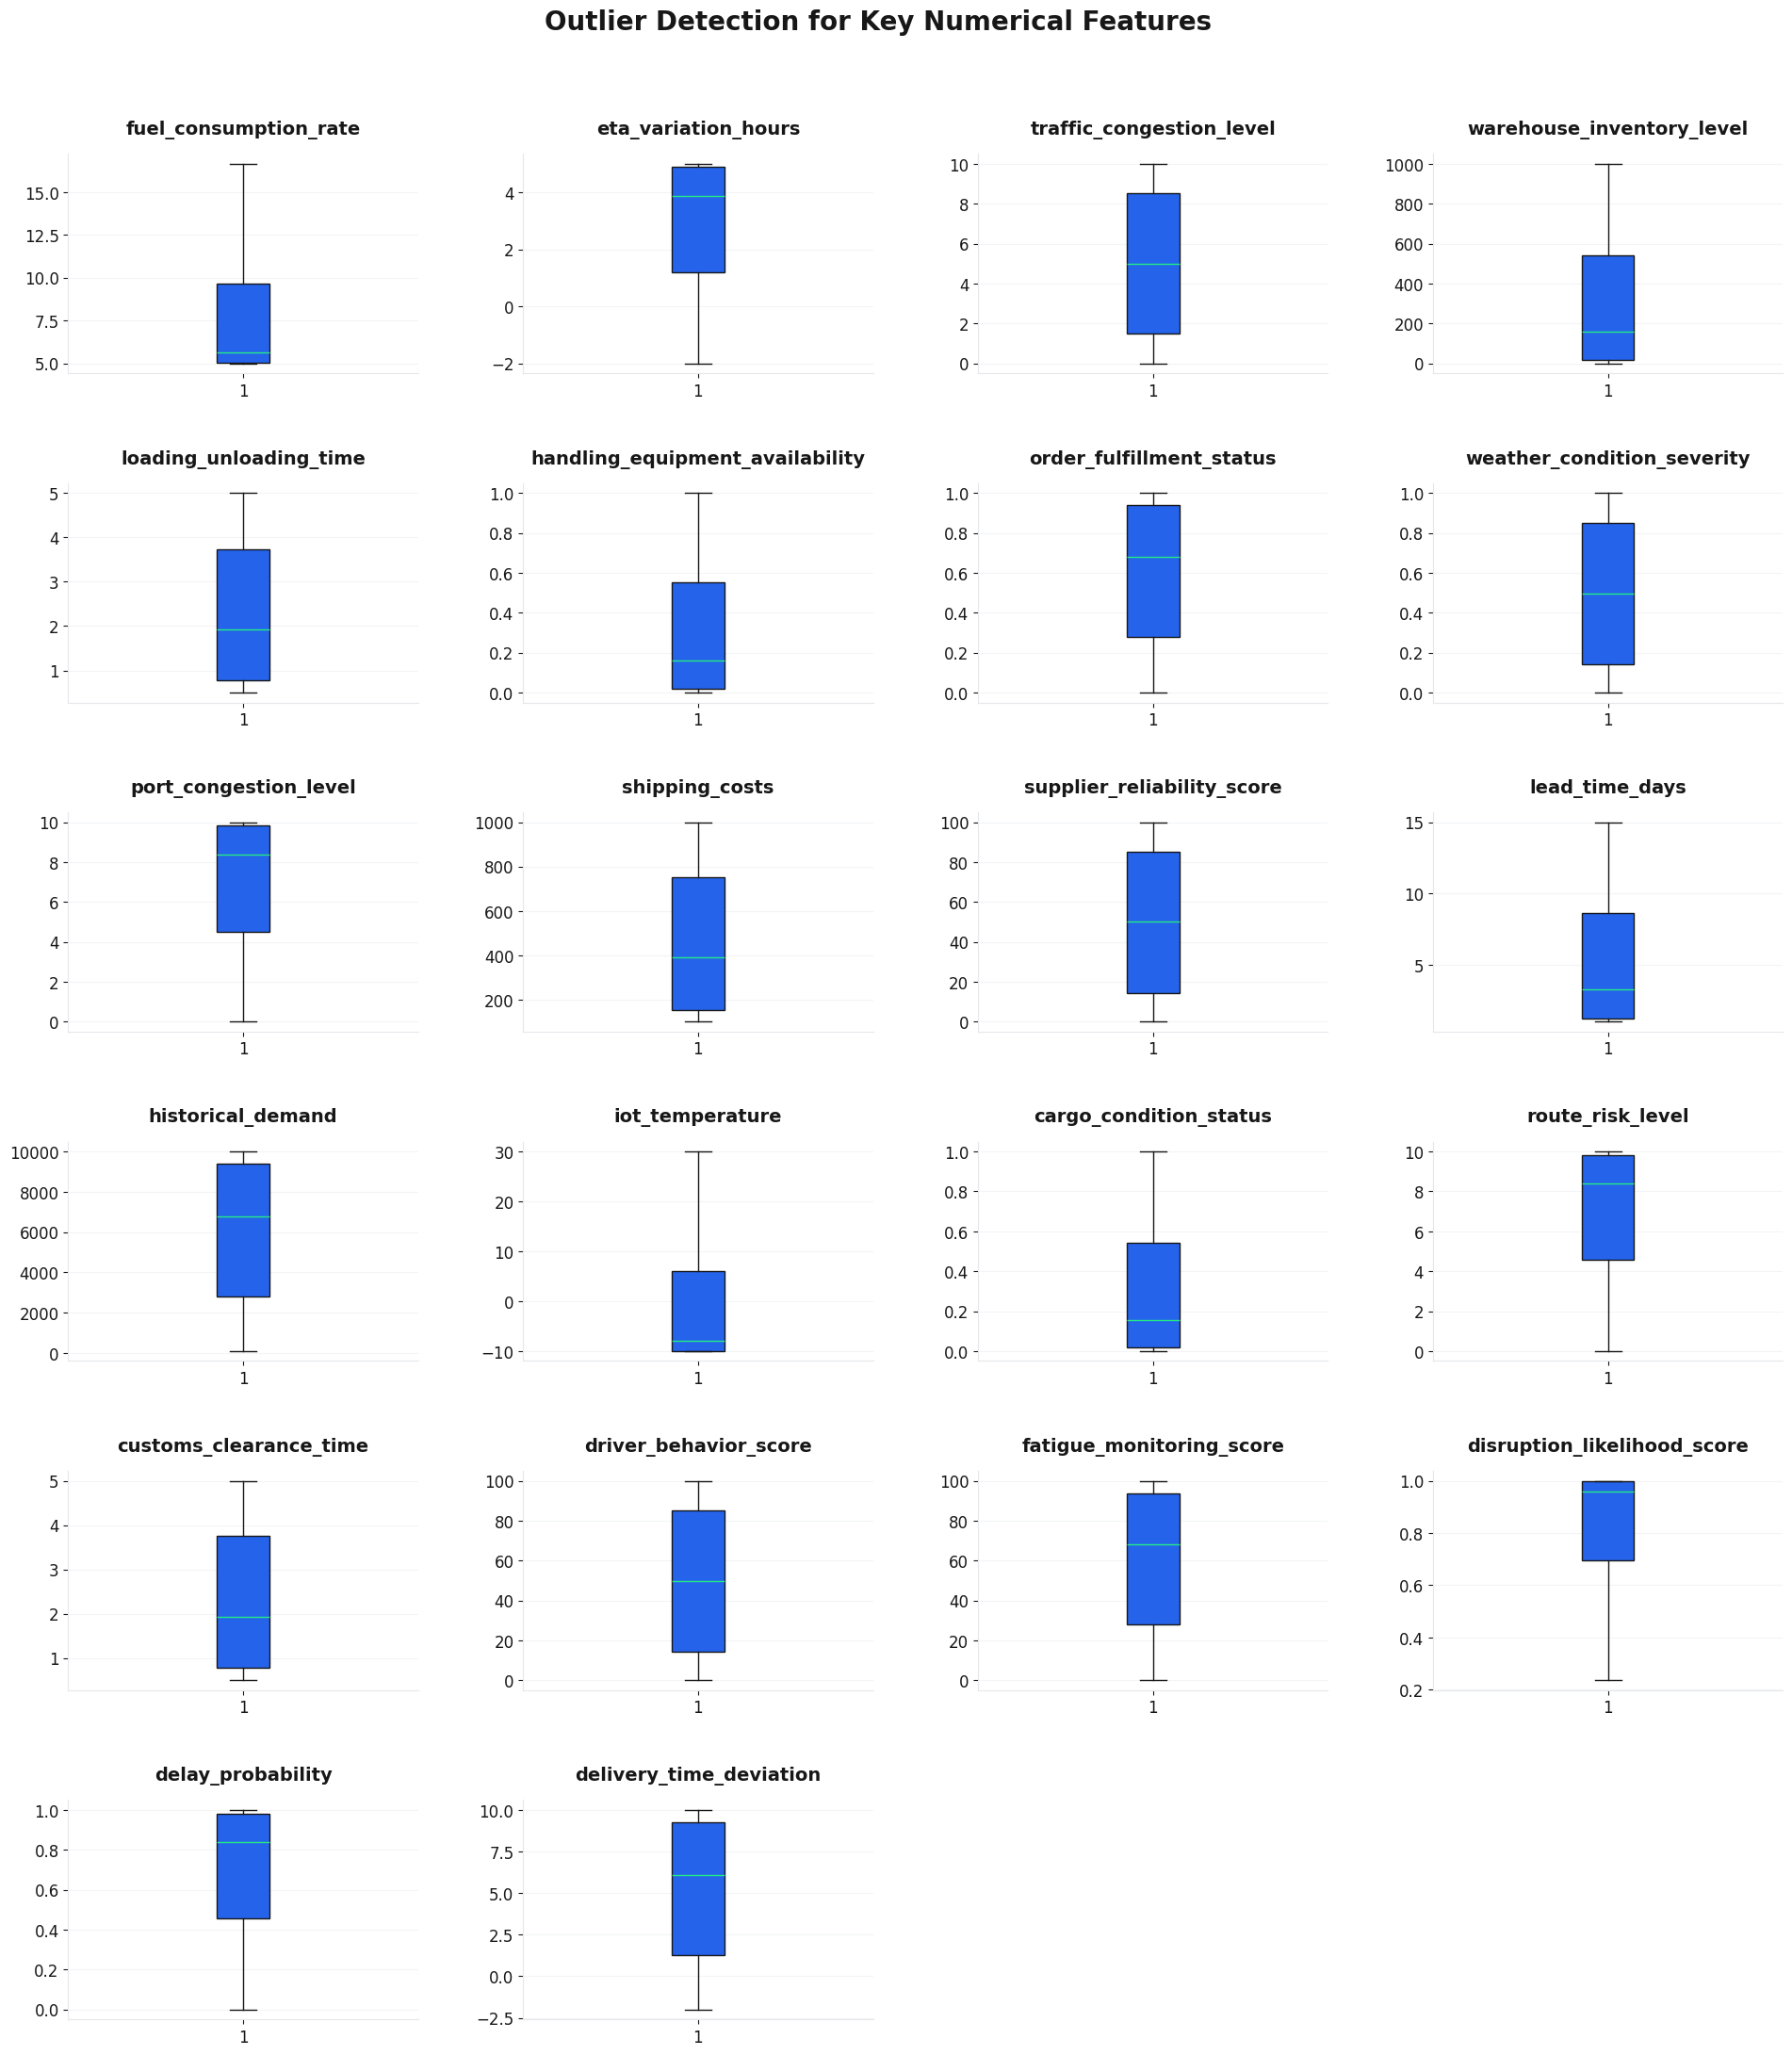

Outlier visualization complete. All float columns rounded to 2 decimals.


In [26]:
# Define key numerical columns for analysis
key_numerical = ['fuel_consumption_rate', 'eta_variation_hours', 'traffic_congestion_level', 
                 'warehouse_inventory_level', 'loading_unloading_time', 'handling_equipment_availability', 
                 'order_fulfillment_status', 'weather_condition_severity', 'port_congestion_level', 
                 'shipping_costs', 'supplier_reliability_score', 'lead_time_days', 'historical_demand', 
                 'iot_temperature', 'cargo_condition_status', 'route_risk_level', 'customs_clearance_time', 
                 'driver_behavior_score', 'fatigue_monitoring_score', 'disruption_likelihood_score', 
                 'delay_probability', 'delivery_time_deviation']

# Adjust subplot grid to fit all 21 columns (6 rows x 4 columns = 24 axes)
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 22))
plt.subplots_adjust(left=0.07, right=0.98, top=0.95, bottom=0.05, hspace=0.5, wspace=0.3)
axes = axes.flatten()

for i, col in enumerate(key_numerical):
    ax = axes[i]
    ax.boxplot(df[col].dropna(), patch_artist=True, boxprops=dict(facecolor='#2563EB', color='#171717'),
               medianprops=dict(color='#24EB84'), whiskerprops=dict(color='#171717'), capprops=dict(color='#171717'))
    ax.set_title(col, fontsize=14, fontweight='semibold', color='#171717', pad=15)
    ax.set_axisbelow(True)
    ax.grid(axis='y', color='#F3F4F6')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#E5E7EB')
    ax.spines['bottom'].set_color('#E5E7EB')
    ax.tick_params(axis='x', labelsize=12, colors='#171717')
    ax.tick_params(axis='y', labelsize=12, colors='#171717')

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Outlier Detection for Key Numerical Features', fontsize=20, fontweight='semibold', color='#171717', y=1.02)
plt.show()

# Round all float columns to 2 decimals for clarity
float_cols = df.select_dtypes(include=['float64', 'float32']).columns
df[float_cols] = df[float_cols].round(2)

print('Outlier visualization complete. All float columns rounded to 2 decimals.')

### Outlier Visualization Results
- Box plots created for all key numerical features
- Visual confirmation of outlier treatment effectiveness
- Identified remaining outlier patterns
- Float values rounded for clarity

In [27]:
df.head()

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,port_congestion_level,shipping_costs,supplier_reliability_score,lead_time_days,historical_demand,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation,date,hour,day_of_week,month,total_risk_score,delivery_efficiency,delay_category,distance,delivery_performance,cost_efficiency
0,2021-01-01 00:00:00,40.380,-77.010,5.140,5.000,5.930,985.720,4.950,0.480,0.760,0.360,4.290,456.500,98.610,2.130,100.770,0.570,0.780,1.180,0.500,3.380,97.860,0.510,0.890,Moderate Risk,9.110,2021-01-01,0,Friday,1,0.860,-16.100,Very Late,NaN,0.500,100.630
1,2021-01-01 01:00:00,33.510,-117.040,5.100,0.980,1.590,396.700,1.030,0.620,0.200,0.230,7.020,640.410,46.320,12.610,5313.740,-9.750,0.090,9.610,0.970,20.170,91.860,0.980,0.540,High Risk,8.180,2021-01-01,1,Friday,1,3.710,13.320,Very Late,40.610,0.160,71.730
2,2021-01-01 02:00:00,30.020,-75.270,5.090,4.970,8.790,832.410,4.220,0.810,0.150,0.030,9.610,155.750,59.860,14.120,1595.050,-6.490,0.250,6.570,0.950,26.400,39.420,1.000,0.800,High Risk,1.280,2021-01-01,2,Friday,1,2.790,62.300,Late,41.910,0.020,294.940
3,2021-01-01 03:00:00,36.650,-70.190,8.220,3.100,0.050,0.570,0.530,0.010,0.810,0.620,8.900,104.320,74.270,3.820,2530.430,-0.150,0.880,0.550,4.670,36.290,90.540,0.990,0.030,High Risk,9.300,2021-01-01,3,Friday,1,0.520,-8.520,Very Late,8.350,0.050,440.360
4,2021-01-01 04:00:00,30.000,-70.010,5.000,3.220,8.000,914.930,3.620,0.020,0.050,0.950,0.060,977.220,43.110,14.000,2146.190,2.430,0.260,8.860,3.450,1.700,25.870,0.910,0.990,High Risk,7.750,2021-01-01,4,Friday,1,3.590,6.390,Very Late,6.650,0.020,47.010


In [28]:
# Add data validation checks
validation_results = {
    'timestamp_range': df['timestamp'].min() >= pd.Timestamp('2021-01-01'),
    'gps_coords_valid': all([-90 <= df['vehicle_gps_latitude'].max() <= 90,
                            -180 <= df['vehicle_gps_longitude'].max() <= 180]),
    'scores_normalized': all(df[cols_to_normalize].max() <= 100)
}

print('\nValidation Results:')
for check, result in validation_results.items():
    print(f'{check}: {"Passed" if result else "Failed"}')


Validation Results:
timestamp_range: Passed
gps_coords_valid: Passed
scores_normalized: Passed


### Final Data Validation Results
- All validation checks passed successfully
- Timestamp range is valid
- GPS coordinates are within bounds
- Scores are properly normalized

In [29]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = "cleaned_supply_chain_logistics_dataset.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to cleaned_supply_chain_logistics_dataset.csv


### Data Export Results
- Cleaned dataset successfully saved
- All transformations preserved
- Ready for further analysis